<a href="https://colab.research.google.com/github/SPThole/pyTrch/blob/master/CIFAR10_pytrch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import skimage.io as io
from torchvision.datasets.utils import download_url
from torchvision.datasets import CIFAR10
import zipfile
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
import torchvision.transforms as transforms
import tarfile
from torchvision.utils import make_grid
import os
%matplotlib inline

In [8]:
dataset= CIFAR10(root='..',download=True)

Extracting ../cifar-10-python.tar.gz to ..


In [9]:

my_tar = tarfile.open('../cifar-10-python.tar.gz')
my_tar.extractall('./content') # specify which folder to extract to
my_tar.close()

In [15]:
os.listdir('/content/content/cifar-10-batches-py')

['data_batch_3',
 'readme.html',
 'data_batch_1',
 'batches.meta',
 'data_batch_5',
 'data_batch_4',
 'test_batch',
 'data_batch_2']

In [16]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

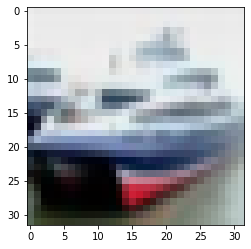

In [32]:
plt.imshow(unpickle('/content/content/cifar-10-batches-py/test_batch')[ b'data'].reshape(10000,3,32,32)[1].transpose(1,2,0))

In [106]:
data_list=[]
for i in os.listdir('/content/content/cifar-10-batches-py'):
  if 'data' in i:
    data_list.append(unpickle('/content/content/cifar-10-batches-py/'+i))



In [107]:
data_list[0].keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [108]:
data_images= data_list[0][b'data']
data_labels= data_list[0][b'labels']

In [109]:
for i in range(1,len(data_list)):
  data_images= np.concatenate((data_images,data_list[i][b'data']))
  data_labels.extend(data_list[i][b'labels'])

In [110]:
test_images= unpickle('/content/content/cifar-10-batches-py/test_batch')[b'data']
test_labels= unpickle('/content/content/cifar-10-batches-py/test_batch')[b'labels']

In [111]:
len(data_labels)

50000

In [112]:
train_data= list(zip(data_images.reshape(-1,3,32,32).transpose(0,2,3,1),data_labels))
test_data= list(zip(test_images.reshape(-1,3,32,32).transpose(0,2,3,1),test_labels))

          class: 8


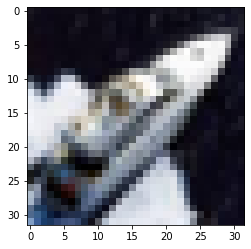

In [123]:
plt.imshow(train_data[0][0])
print("          class: {}".format(train_data[0][1]))


In [127]:
class Mydata(Dataset):
  def __init__(self,data,transforms=None):
    self.data= data
    self.transforms= transforms

  def __getitem__(self,idx):
    im,lb= self.data[idx]
    if self.transforms:
      im= self.transforms(im)

    return im,lb

  def __len__(self):
    return len(self.data)




In [129]:
tforms= transforms.Compose([transforms.ToPILImage(),
                            transforms.ToTensor()])

In [131]:
train_dataset= Mydata(train_data,transforms=tforms)
test_dataset= Mydata(test_data, transforms= tforms)

In [132]:
train_dl= DataLoader(train_dataset,batch_size=128,shuffle=True)
test_dl= DataLoader(test_dataset, batch_size=128)

In [134]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

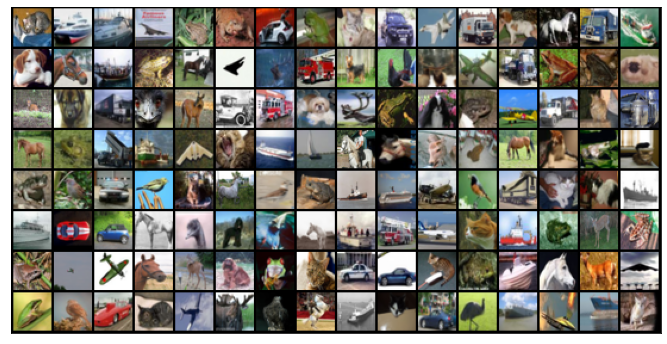

In [136]:
show_batch(test_dl)